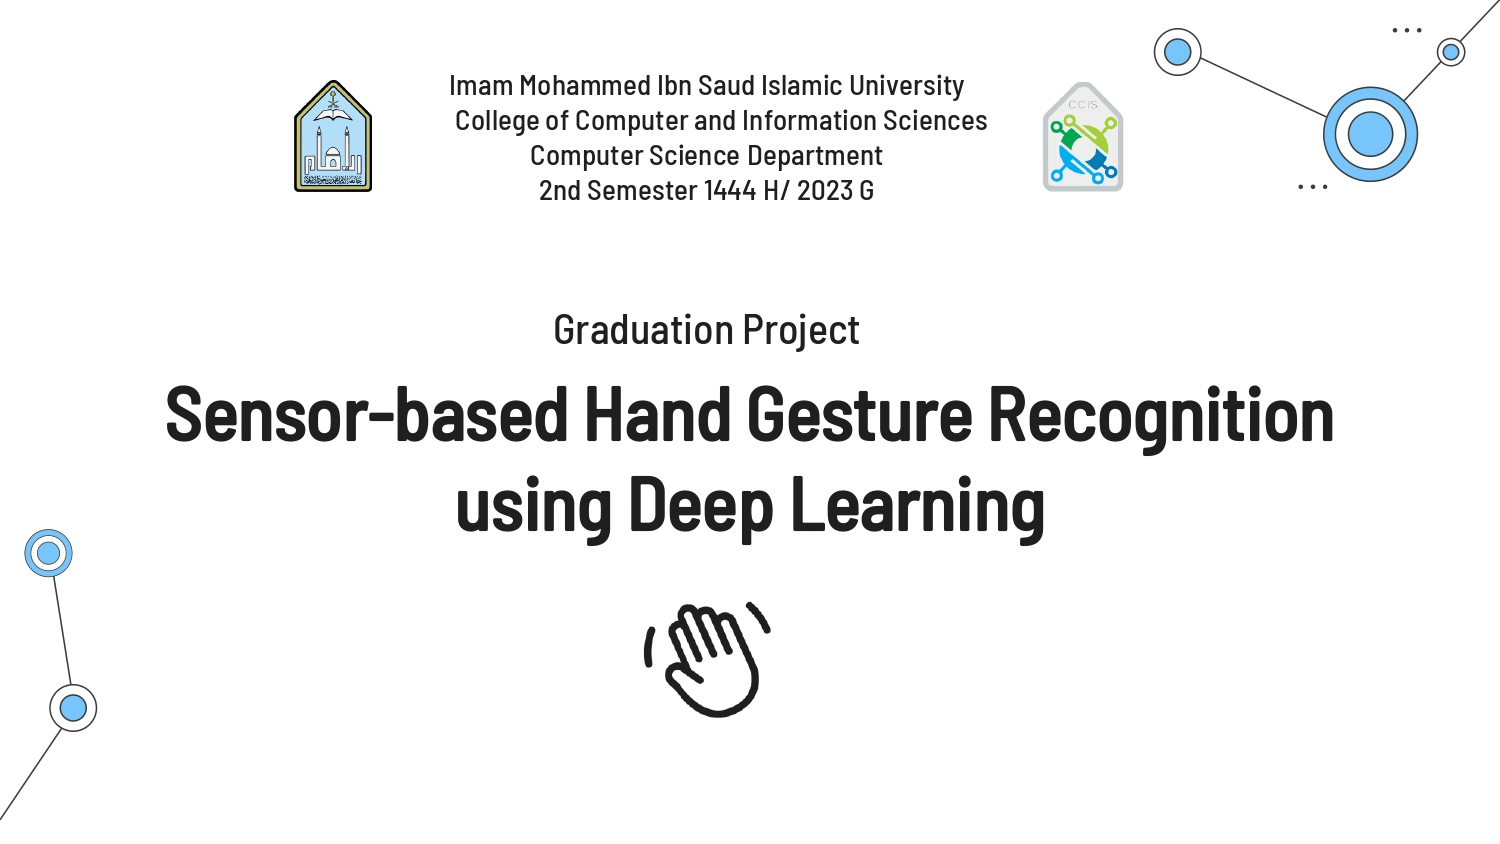

**Imam Mohammed Ibn Saud Islamic University**<br>
**College of Computer and Information Sciences**<br>
**Computer Science Department**<br>
2nd Semester 1444 H/ 2023 G<br><br>

**Supervisor:** Mannan Al-Musallam<br>
**Group:** F8


| Student Name | ID | 
| :-: | :-: | 
|Razan Saad Alabudlkarim |440021710|
|Abeer Mohamed Aldosari |440023513|
| Nouf Mohammed Alajmi|441022333|
| Mudhi Abdulaziz Alqahtani |439021022|

# Table of Content
1. Abstract
2. Introduction
3. Hand Gesture Dataset<br>
   3.1 Dataset Description<br>
   3.2 Importing Libraries <br>
   3.3 Loading Dataset<br>
   3.4 Exploring Dataset<br>
4. Data Pre-procesing<br>
   4.1 Feature Selection<br>
   4.2 Data Standarization<br>
   4.3 Data Segmentation<br>
   4.4 Data Splitting<br>
5. CNN model implementation<br>
   5.1 CNN model with one layer<br>
   5.2 CNN model with two layers<br>
   5.3 CNN model with three layers<br>
6. LSTM model implementation<br>
   6.1 LSTM model<br>
   6.2 Results<br>
7. Hybrid CNN-LSTM model implementation<br>
   7.1 CNN-LSTM model <br>
   7.2 Results<br>
8. Conclusion
9. References

# 1. Abstract
Over the past few years, the classification of human physical activity through the use of cameras and sensors embedded in mobile phones and smartwatches, known as human activity recognition (HAR), has emerged as an important research topic in various fields, including healthcare, surveillance, education, and human-computer interaction. This study seeks to evaluate the performance of deep learning algorithms, namely convolutional neural network (CNN) and recurrent neural network (RNN), as well as a hybrid model between the two, on the SmartWatch hand gestures dataset provided by the TeV website. We conducted several experiments to implement CNN, LSTM, and hybrid CNN-LSTM and optimize their parameters on the target dataset. Our findings indicate that all three models achieved an average accuracy of 95%, demonstrating promising results for this research. The hybrid CNN-LSTM model performed slightly better than the others, with an accuracy of 96%. Lastly, we suggested potential future directions and areas for further research in this field.

# 2. Introduction
In recent years, advancements in technology and the availability of various sensors have enabled a wide range of research to be conducted in the field of Human Activity Recognition (HAR). HAR is a process that tracks and recognizes human activities to provide assistance and improve human lives in many aspects, such as healthcare, security, and fitness. This activity tracking can be done either by using sensors embedded in wearable devices, smartphones, smartwatches, etc., or through visual means with cameras. Additionally, HAR can be divided into two categories: activities performed by lower limb parts (e.g. walking) or upper limb parts (e.g. hand gestures). This project focuses on sensor-based upper limb human activity recognition specifically hand gesture recognition. Machine Learning (ML) and Deep Learning (DL) models are essential components for HAR applications to extract useful information and make decisions. In this document, the Python code and implementation of the project were written and organized in such a way to be readable and understandable.

# 3. Hand Gesture Dataset
After providing an overview of the project in the introduction, let us now move on to the code implementation. In this section, we will begin by exploring and uploading the hand gesture dataset.

## 3.1 Dataset Description
[SmartWatch Gestures Dataset](https://tev.fbk.eu/resources/smartwatch) [1] is a publicly available dataset consisting of sensor records of hand gestures. This dataset was collected using the accelerometer sensor embedded in the first-generation Sony smartwatch to capture a total of 20 gestures, as shown in Figure 1 below, from eight different users. The smartwatch is worn on the right wrist and the experiment starts by tapping on the screen of a smartwatch to start capturing the hand gesture and ends by tapping on the screen. The process is repeated for each of the gestures twenty times, which results in a total of 3200 samples of sequences of x, y, and y accelerometer data.


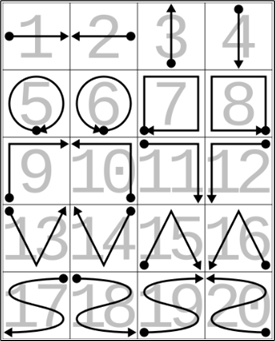

<font color='grey'>Figure 1: Hand gestures in the SmartWatch Gestures Dataset.</font>


The dataset consists of a collection of 8 main folders, each representing a unique user. Within each of these 8 folders, there are 20 subfolders, each corresponding to a specific hand gesture performed by the user. The subfolders are numbered according to the hand gesture performed (from Gesture 1 to Gesture 20). Also, each subfolder contains 20 instances (replications) of the user performing that hand gesture. In total, the dataset consists of 3200 instances (8 users x 20 hand gestures x 20 replications).<br>
To simplify the analysis and management of the dataset, the dataset files have been consolidated into a single .txt file. The "hand_gesture_dataset.txt" file can be found in the project [GitHub repository](https://github.com/RazanAlabdulkarim/Sensor-based-Hand-Gesture-Recognition-using-Deep-Learning). This file contains all of the sensor data and timestamps for all of the hand gestures performed by all 8 users, resulting in a file of 63,168 rows. Having the data consolidated into a single file offers several benefits, such as eliminating the need to manually open and process multiple individual files, saving time, and enabling more efficient data analysis, as the data can be easily filtered and sorted based on specific criteria, such as user ID, hand gesture type, or timestamp.<br>

## 3.2 Importing Libraries
Import the required libraries for the project.

In [ ]:
# keras tuner need to be installed manually
!pip install keras-tuner

**Keras Tuner** is used for hyperparameter tuning in all deep-learning models implementations. Keras Tuner is a popular open-source library that helps machine learning practitioners to tune their model's hyperparameters efficiently. Hyperparameters are settings for a model that are not learned from the data but instead are specified by the practitioner, such as the number of hidden layers, the learning rate, or the dropout ratio. Keras Tuner offers a simple and flexible way to perform hyperparameter optimization. It provides various algorithms and strategies for searching through the hyperparameter space, including random search, grid search, and Bayesian optimization. Further information regarding the hyperparameter tuning and Bayesin optimization can be found in **section 3.2** of the report.

In [ ]:
# for loading the dataset
import pandas as pd
from pandas import read_csv # used to read the dataset file
import numpy as np
import seaborn as sns

# for data visualization
import matplotlib.pyplot as plt

# for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder # for normalization
import scipy.stats as stats # for calculations
import math # for caluclations
from sklearn.model_selection import train_test_split # for data splitting

# for deep Learning model implementation
import tensorflow as tf
from keras import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping

# for model optimization
import keras_tuner as kt

# for results presentation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from mlxtend.plotting import plot_confusion_matrix

## 3.3 Loading Dataset
In this section, the dataset is loaded from the external file, with the following columns:
*   **user:** the user number, total of 8 users.
*   **gesture:** the gesture number, total of 20 gestures.
*   **repeation:** the number or repeation cycle, each user performed each gesture 20 times.
*   **milliseconds:** time event in milliseconds.
* **nanoseconds:** time event in nanoseconds.
* **timestamp:** time event in timestamp.
* **x-axis:** the value of accelerometer in x-axis.
* **y-axis:** the value of accelerometer in y-axis.
* **z-axis:** the value of accelerometer in z-axis.

**Note:** to load the dataset successfully, you need to insert the dataset directory link in the read_csv method where it is saved in your device.




In [ ]:
# load the dataset from the dataset txt file with help of read_csv method
df = read_csv('hand_gesture_dataset.txt', header = None, delim_whitespace = True)
df.columns=['user','gesture','repetition','milliseconds','nanoseconds', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

In [ ]:
print("overview of the dataset")
df

overview of the dataset


,user,gesture,repetition,milliseconds,nanoseconds,timestamp,x-axis,y-axis,z-axis
0,1,1,1,1.384186e+12,7.895260e+13,1.452892e+12,1.532289,-0.919373,10.113108
1,1,1,1,1.384186e+12,7.895271e+13,1.453002e+12,0.919373,-0.919373,9.959879
2,1,1,1,1.384186e+12,7.895282e+13,1.453112e+12,1.838747,-0.153229,10.726024
3,1,1,1,1.384186e+12,7.895291e+13,1.453222e+12,5.822699,3.371036,10.879252
4,1,1,1,1.384186e+12,7.895302e+13,1.453332e+12,6.435614,1.532289,9.193734
...,...,...,...,...,...,...,...,...,...
63163,8,20,20,1.387457e+12,6.595416e+14,1.029270e+12,-4.443638,1.991976,9.040505
63164,8,20,20,1.387457e+12,6.595417e+14,1.029380e+12,-4.137181,2.145205,8.887277
63165,8,20,20,1.387457e+12,6.595418e+14,1.029490e+12,-5.056554,1.838747,7.508216
63166,8,20,20,1.387457e+12,6.595420e+14,1.029600e+12,-4.290410,1.225831,9.346964


In [ ]:
# show the dataset content (rows, colomns)

print("Dataset consists of :")
print(str(df.shape[0]) + " rows")
print(str(df.shape[1]) + " columns")

Dataset consists of :
63168 rows
9 columns


## 3.4 Exploring Dataset
This section aims to provide an overview of the dataset content by exploring and visualizing the hand gesture signals. To begin with, we visualized the number of rows associated with each hand gesture to reveal variations in signal length across the gestures.

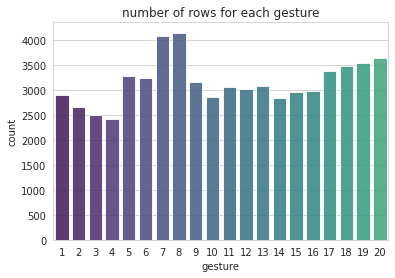

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "gesture", data = df, palette = sns.color_palette("viridis", 30), alpha=0.85)
plt.title("number of rows for each gesture")

plt.show()

And also visualizing the varitey of signal length of gestures for each user.

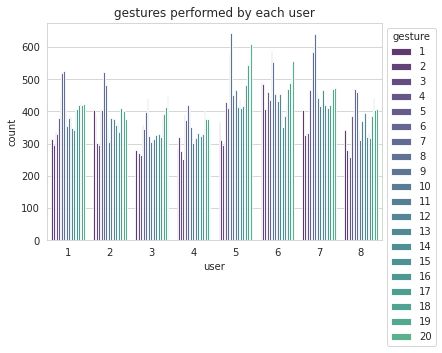

In [ ]:
ax = sns.countplot(x = "user",  hue = "gesture", palette = sns.color_palette("viridis", 30), alpha=0.85, data = df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("gestures performed by each user")
plt.show()

Here we take a look at the signal wave shape performed by each hand gesture in terms of the x, y, and z-axis of the accelerometers data.

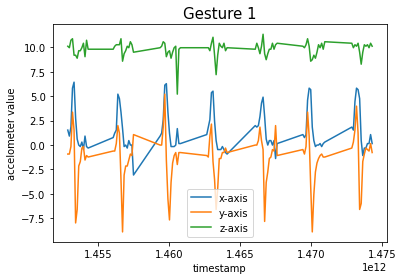

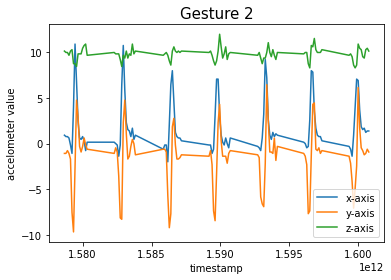

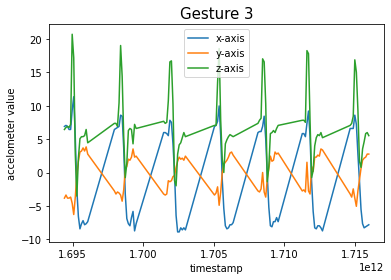

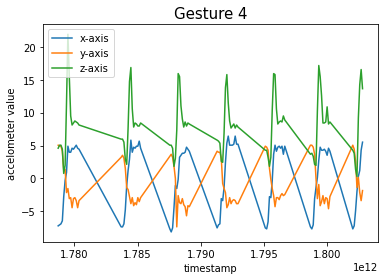

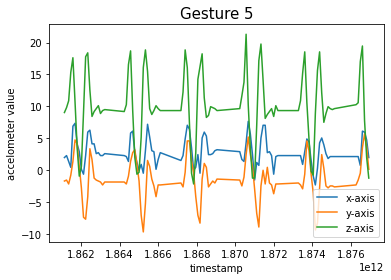

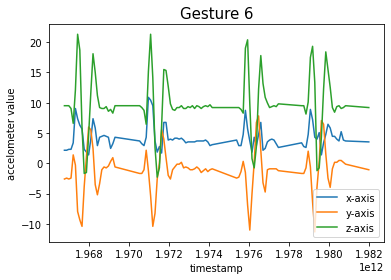

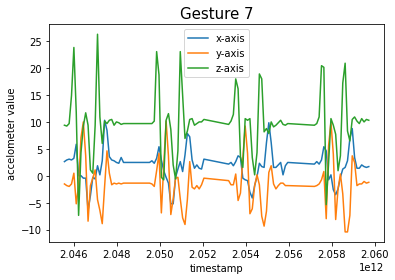

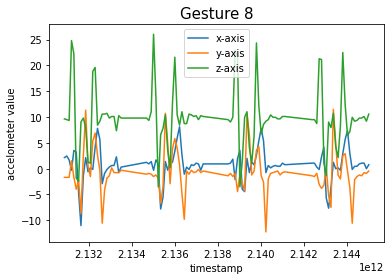

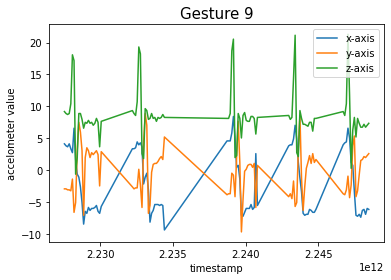

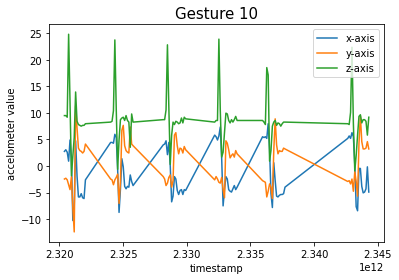

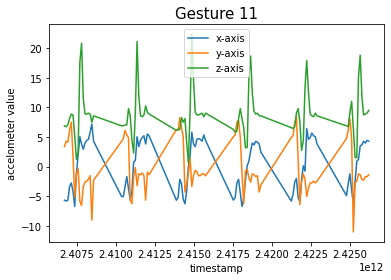

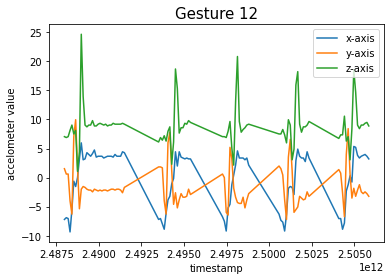

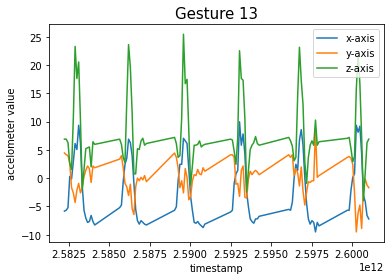

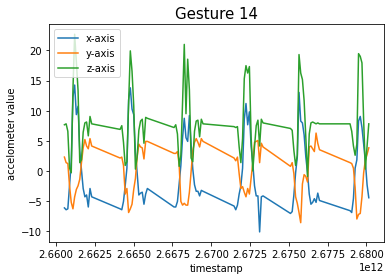

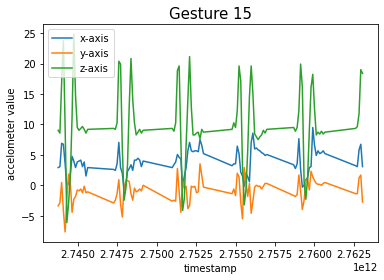

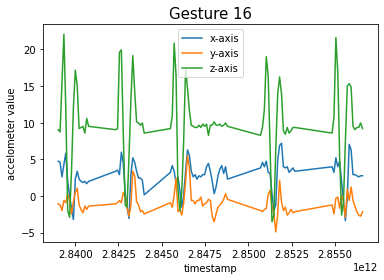

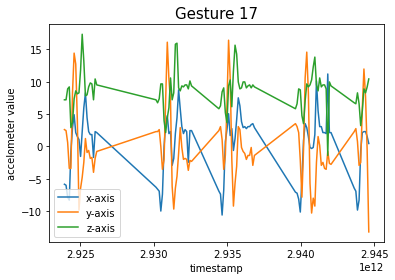

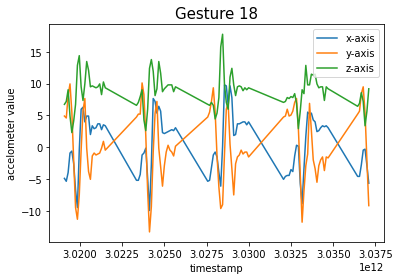

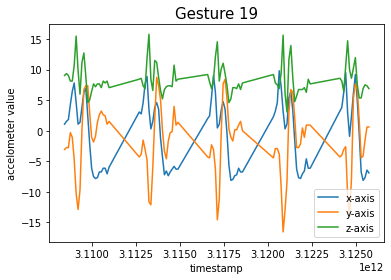

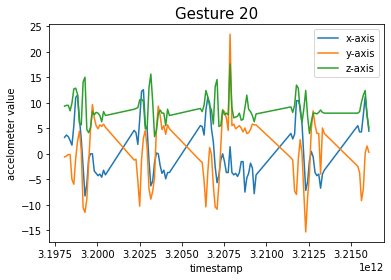

In [ ]:
for i in range(1,21):
    data36 = df[(df["gesture"] == i)][:100]
    sns.lineplot(y = "x-axis", x = "timestamp", palette=['#FF983F', '#56B356', '#599AC6'], data = data36)
    sns.lineplot(y = "y-axis", x = "timestamp", palette=['#FF983F', '#56B356', '#599AC6'], data = data36)
    sns.lineplot(y = "z-axis", x = "timestamp", palette=['#FF983F', '#56B356', '#599AC6'], data = data36)
    plt.legend(["x-axis", "y-axis", "z-axis"])
    plt.ylabel("accelometer value")
    plt.title("Gesture "+str(i), fontsize = 15)
    plt.show()

#4. Data Pre-processing
To improve the quality of data and ensure its suitability for model training and testing, data preprocessing is a crucial step. The performance of the model is directly influenced by the quality of the data, hence various data preprocessing techniques: **feature selection**, **data standardization**, **data segmentation**, and **data splitting** are utilized.

## 4.1 Feature Selection
The dataset that has been selected contains two main categories of data:

*   **time-related features:** time events at which the signals were recorded, icluding millisecond, nanoseconds, timestamp columns.
*   **signal-related features:** consist of the accelerometer data recording of hand gesture, icluding x-axis, y-axis, and z-axis columns.

user ids, gesture numbers, and re being excluded as they are not considered features.According to  scientific papers related to this field, the primarily is to focus on analyzing the accelerometers data in the x, y, and z-axis only.

In [ ]:
# drop unnecessary features to focus only on the accelerometer data
df = df.drop(['user','repetition','milliseconds','nanoseconds', 'timestamp'], axis = 1).copy()
df.head()

,gesture,x-axis,y-axis,z-axis
0,1,1.532289,-0.919373,10.113108
1,1,0.919373,-0.919373,9.959879
2,1,1.838747,-0.153229,10.726024
3,1,5.822699,3.371036,10.879252
4,1,6.435614,1.532289,9.193734


In [ ]:
# convert gestures to be in range (0,19) instead of (1,20)
# this step is required in the implementation of deep learning model later

label = LabelEncoder()
df['gesture'] = label.fit_transform(df.pop('gesture'))
df.head()

,x-axis,y-axis,z-axis,gesture
0,1.532289,-0.919373,10.113108,0
1,0.919373,-0.919373,9.959879,0
2,1.838747,-0.153229,10.726024,0
3,5.822699,3.371036,10.879252,0
4,6.435614,1.532289,9.193734,0


## 4.2 Data Standarization
The **StandardScaler** is a technique or utility used to transform the variables within a dataset to have a mean of 0 and a standard deviation of 1. This process promotes greater computational stability and helps to prevent the algorithms from generating unreliable or unstable outcomes.

In [ ]:
# dataset before data standardization
df.head()

,x-axis,y-axis,z-axis,gesture
0,1.532289,-0.919373,10.113108,0
1,0.919373,-0.919373,9.959879,0
2,1.838747,-0.153229,10.726024,0
3,5.822699,3.371036,10.879252,0
4,6.435614,1.532289,9.193734,0


In [ ]:
# get the accelerometers data to apply standarization on it
x = df[['x-axis', 'y-axis', 'z-axis']]
y = df['gesture']

In [ ]:
# use StandardScalar
scaler = StandardScaler()
X = scaler.fit_transform(x)

scaled_X = pd.DataFrame(data = X, columns = ['x-axis', 'y-axis', 'z-axis'])
scaled_X['gesture'] = y.values

In [ ]:
# dataset after data standardization
scaled_X.head()

,x-axis,y-axis,z-axis,gesture
0,-0.329455,0.099292,0.463629,0
1,-0.435202,0.099292,0.431761,0
2,-0.276582,0.273918,0.591101,0
3,0.410775,1.077195,0.622969,0
4,0.516522,0.658094,0.272421,0


## 4.3 Data Segmentation
This section covers the implementation code of the data segmentation experiment conducted to select the best **window size** and **overlapping ratio** for the target dataset. More details are provided in section **4.3** in the report.

### 4.3.1 Data Segmentation Experiment

In [ ]:
# method to segment the dataset
def get_frames(df, window_size, hop_size):

    number_of_features = 3

    frames = []
    labels = []

    for i in range(0, len(df) - window_size, hop_size):
        x = scaled_X['x-axis'].values[i: i + window_size]
        y = scaled_X['y-axis'].values[i: i + window_size]
        z = scaled_X['z-axis'].values[i: i + window_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(scaled_X['gesture'][i: i + window_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, window_size, number_of_features)
    labels = np.asarray(labels)

    return frames, labels

In this expermint, we have used CNN and LSTM architectures provided by this paper [here](https://peerj.com/articles/cs-1052/) [2].

In [ ]:
# CNN model
def build_CNN_expermint(X_train):
    
    # create the deep learning model
    model = Sequential()
    
    # input layer (1-D CNN layer)
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train[0].shape)))
    
    model.add(Dropout(0.5))

    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    # output layer
    model.add(Dense(20, activation='softmax'))
    
    model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
# LSTM model
def build_LSTM_expermint(X_train):
    
    # create the deep learning model
    model = Sequential()
    
    # input layer (1 LSTM layer)
    model.add(LSTM(100,recurrent_dropout = 0.5, activation='relu', input_shape=(X_train[0].shape)))

    model.add(Flatten())

    model.add(Dense(100, activation='relu'))

    # output layer
    model.add(Dense(20, activation='softmax'))
    
    model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

The experiment is conducted using:


*  **windows sizes:** 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200.
*   **overlapping:** %0 (no overlapping), %25, %50, %75.



In [ ]:
# initialize the window sizes list
window_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200]

# initialize the overlpping ratios list
overlapping_percentages = [0, 25, 50, 75]

# initialize the model architectures list
reference_architectures = ["CNN", "LSTM"]

Initialize lists to store the results of each window size and overlapping combination on the CNN and LSTM models.

In [ ]:
# to store the model name
models_list = []

# to store the window sizes
window_sizes_list = []

# to store the overlapping ratios
overlapping_percentages_list = []

# to store the hop sizes
hop_sizes_list = []

# to store the accuracy results
accuracies_list = []

# to store the f1-score results
f1_scores_list = []

# to store the loss results
losses_list = []

Perform a loop to test every combination of window size and overlapping, and save the corresponding results.

In [ ]:
# technique used to stop the trainig process when there is no improvement in the results
early_stopping = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 4)

In [ ]:
# loop to go through each of the model architectures
for reference_architecture in reference_architectures:
  
  # loop to go through each window size
  for window in window_sizes:
    
    # loop to go through each overlapping percentage
    for overlapping in overlapping_percentages:

      # store the current reference architecture
      models_list.append(reference_architecture)

      # store the current window size
      window_sizes_list.append(window)

      # store the current overlapping percentage
      overlapping_percentages_list.append(overlapping)
      
      # calculate the hop size, using window size and overlapping percentage
      if overlapping == 0:
        hop_size = window
      elif overlapping == 25:
        hop_size =int(math.floor(window * (75/100)))
      elif overlapping == 50:
        hop_size =int( math.floor(window * (50/100)))
      else:
        hop_size =int(math.floor(window * (25/100)))

      # store the hop size
      hop_sizes_list.append(hop_size)

      print("current expermintal model : "+ reference_architecture)
      print("current window = "+str(window)+ ", hop size = "+ str(hop_size) + ", overlapping = %"+ str(overlapping))
      print("")

      # split the dataset according to the current window size and hop size
      X, Y = get_frames(scaled_X, window, hop_size)

      # split data set into %80, %10, %10 for training, testing, and validation, respectively
      X_train, X_valtest, y_train, y_valtest = train_test_split(X, Y, test_size=0.2,stratify = Y)
      X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, stratify = y_valtest)

      # call the expermintal model
      if reference_architecture.__eq__("CNN"):
        model = build_CNN_expermint(X_train)

      else:
        model = build_LSTM_expermint(X_train)
      
      # train the model
      print("training ...")
      history = model.fit(X_train,y_train,
                          epochs=100,
                          validation_data=(X_val, y_val),
                          callbacks = [early_stopping],
                          verbose=1,
                          batch_size  = 64)
      # test the model
      print("")
      print("testing ...")
      loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
      print("Test Accuracy :", accuracy)
      print("Test Loss :", loss)
      print("")

      # store the accuracy score
      accuracies_list.append(accuracy)

      # store the loss score
      losses_list.append(loss)

      print(" classification report ...")
      # predict the smaples from the test set to get the classification report
      y_pred = model.predict(X_test)
      y_pred = np.argmax(y_pred, axis=1)

      # get the classification report to extract the f1-score value
      report = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
      precision,recall,fscore,support=score(y_test,y_pred,average='macro')

      # store the f1-score value
      f1_scores_list.append(fscore)
      print("f1-score : " + str(fscore))
      print("")
      print("----------------------------------------------------------------------------------")

Streaming output truncated to the last 5000 lines.
Epoch 58/100
53/53 [==============================] - 0s 8ms/step - loss: 1.6108 - accuracy: 0.4427 - val_loss: 1.6215 - val_accuracy: 0.4869
Epoch 59/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5776 - accuracy: 0.4569 - val_loss: 1.6102 - val_accuracy: 0.4822
Epoch 60/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5996 - accuracy: 0.4486 - val_loss: 1.6132 - val_accuracy: 0.4798
Epoch 61/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5812 - accuracy: 0.4593 - val_loss: 1.6135 - val_accuracy: 0.4822
Epoch 62/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5984 - accuracy: 0.4466 - val_loss: 1.6152 - val_accuracy: 0.4893
Epoch 63/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5974 - accuracy: 0.4564 - val_loss: 1.6097 - val_accuracy: 0.4537
Epoch 64/100
53/53 [==============================] - 1s 9ms/step - loss: 1.5922 - accuracy: 0.44

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
11/11 [==============================] - 2s 56ms/step - loss: 3.1589 - accuracy: 0.0595 - val_loss: 2.8343 - val_accuracy: 0.0952
Epoch 2/100
11/11 [==============================] - 0s 25ms/step - loss: 2.6524 - accuracy: 0.1696 - val_loss: 2.5891 - val_accuracy: 0.2381
Epoch 3/100
11/11 [==============================] - 0s 26ms/step - loss: 2.3290 - accuracy: 0.2812 - val_loss: 2.4271 - val_accuracy: 0.2500
Epoch 4/100
11/11 [==============================] - 0s 27ms/step - loss: 2.0829 - accuracy: 0.3482 - val_loss: 2.2885 - val_accuracy: 0.2857
Epoch 5/100
11/11 [==============================] - 0s 30ms/step - loss: 1.8675 - accuracy: 0.4509 - val_loss: 2.1858 - val_accuracy: 0.2976
Epoch 6/100
11/11 [==============================] - 0s 29ms/step - loss: 1.7295 - accuracy: 0.4554 - val_loss: 2.1141 - val_accuracy: 0.2738
Epoch 7/100
11/11 [==============================] - 0s 28ms/step - loss: 1.5934 - accuracy: 0.5015 - val_loss: 2.0323 - val_accuracy: 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
6/6 [==============================] - 2s 106ms/step - loss: 3.0983 - accuracy: 0.0565 - val_loss: 2.6288 - val_accuracy: 0.1667
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 2.5699 - accuracy: 0.2202 - val_loss: 2.3906 - val_accuracy: 0.2857
Epoch 3/100
6/6 [==============================] - 0s 42ms/step - loss: 2.0688 - accuracy: 0.4196 - val_loss: 2.2574 - val_accuracy: 0.3810
Epoch 4/100
6/6 [==============================] - 0s 45ms/step - loss: 1.7793 - accuracy: 0.5298 - val_loss: 2.1022 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 0s 43ms/step - loss: 1.4719 - accuracy: 0.6250 - val_loss: 1.9987 - val_accuracy: 0.4048
Epoch 6/100
6/6 [==============================] - 0s 43ms/step - loss: 1.3149 - accuracy: 0.6458 - val_loss: 1.8886 - val_accuracy: 0.4286
Epoch 7/100
6/6 [==============================] - 0s 43ms/step - loss: 1.0890 - accuracy: 0.7470 - val_loss: 1.8473 - val_accuracy: 0.3810
Epoch 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
8/8 [==============================] - 2s 114ms/step - loss: 3.0593 - accuracy: 0.0833 - val_loss: 2.6763 - val_accuracy: 0.1111
Epoch 2/100
8/8 [==============================] - 0s 52ms/step - loss: 2.4419 - accuracy: 0.2381 - val_loss: 2.3326 - val_accuracy: 0.3016
Epoch 3/100
8/8 [==============================] - 0s 53ms/step - loss: 2.0333 - accuracy: 0.3492 - val_loss: 2.1467 - val_accuracy: 0.2698
Epoch 4/100
8/8 [==============================] - 0s 46ms/step - loss: 1.7333 - accuracy: 0.4960 - val_loss: 2.0485 - val_accuracy: 0.3175
Epoch 5/100
8/8 [==============================] - 0s 51ms/step - loss: 1.5231 - accuracy: 0.5595 - val_loss: 1.9127 - val_accuracy: 0.4127
Epoch 6/100
8/8 [==============================] - 0s 55ms/step - loss: 1.3094 - accuracy: 0.6310 - val_loss: 1.8297 - val_accuracy: 0.3810
Epoch 7/100
8/8 [==============================] - 0s 59ms/step - loss: 1.1344 - accuracy: 0.7004 - val_loss: 1.7662 - val_accuracy: 0.4444
Epoch 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
24/24 [==============================] - 8s 185ms/step - loss: 2.9716 - accuracy: 0.0765 - val_loss: 2.9366 - val_accuracy: 0.0628
Epoch 2/100
24/24 [==============================] - 3s 118ms/step - loss: 2.9141 - accuracy: 0.0856 - val_loss: 2.9082 - val_accuracy: 0.0576
Epoch 3/100
24/24 [==============================] - 3s 123ms/step - loss: 2.8672 - accuracy: 0.0922 - val_loss: 2.8760 - val_accuracy: 0.0942
Epoch 4/100
24/24 [==============================] - 3s 119ms/step - loss: 2.8090 - accuracy: 0.1118 - val_loss: 2.7920 - val_accuracy: 0.0942
Epoch 5/100
24/24 [==============================] - 4s 159ms/step - loss: 2.7140 - accuracy: 0.1307 - val_loss: 2.7275 - val_accuracy: 0.1047
Epoch 6/100
24/24 [==============================] - 3s 117ms/step - loss: 2.6323 - accuracy: 0.1281 - val_loss: 2.7246 - val_accuracy: 0.1152
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 2.5750 - accuracy: 0.1497 - val_loss: 2.6084 - val_acc

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
22/22 [==============================] - 7s 156ms/step - loss: 2.9692 - accuracy: 0.0609 - val_loss: 2.9239 - val_accuracy: 0.0643
Epoch 2/100
22/22 [==============================] - 4s 176ms/step - loss: 2.8742 - accuracy: 0.0909 - val_loss: 3.3639 - val_accuracy: 0.1287
Epoch 3/100
22/22 [==============================] - 3s 131ms/step - loss: 2.8350 - accuracy: 0.1327 - val_loss: 2.8267 - val_accuracy: 0.1170
Epoch 4/100
22/22 [==============================] - 3s 134ms/step - loss: 2.7793 - accuracy: 0.1327 - val_loss: 2.7412 - val_accuracy: 0.1287
Epoch 5/100
22/22 [==============================] - 3s 134ms/step - loss: 2.7080 - accuracy: 0.1481 - val_loss: 2.6743 - val_accuracy: 0.1404
Epoch 6/100
22/22 [==============================] - 4s 170ms/step - loss: 2.6045 - accuracy: 0.1576 - val_loss: 2.6360 - val_accuracy: 0.1637
Epoch 7/100
22/22 [==============================] - 3s 131ms/step - loss: 2.5521 - accuracy: 0.1554 - val_loss: 2.5693 - val_acc

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
11/11 [==============================] - 7s 378ms/step - loss: 2.9833 - accuracy: 0.0774 - val_loss: 2.9677 - val_accuracy: 0.0476
Epoch 2/100
11/11 [==============================] - 3s 255ms/step - loss: 3.1768 - accuracy: 0.0952 - val_loss: 2.9425 - val_accuracy: 0.0476
Epoch 3/100
11/11 [==============================] - 3s 253ms/step - loss: 2.9268 - accuracy: 0.0938 - val_loss: 2.9382 - val_accuracy: 0.1071
Epoch 4/100
11/11 [==============================] - 3s 249ms/step - loss: 2.9183 - accuracy: 0.1131 - val_loss: 2.9256 - val_accuracy: 0.1190
Epoch 5/100
11/11 [==============================] - 4s 343ms/step - loss: 2.9012 - accuracy: 0.1235 - val_loss: 2.9067 - val_accuracy: 0.1310
Epoch 6/100
11/11 [==============================] - 3s 245ms/step - loss: 2.9917 - accuracy: 0.1295 - val_loss: 2.8871 - val_accuracy: 0.1310
Epoch 7/100
11/11 [==============================] - 3s 243ms/step - loss: 2.8696 - accuracy: 0.1339 - val_loss: 2.8911 - val_acc

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
16/16 [==============================] - 8s 270ms/step - loss: 2.9827 - accuracy: 0.0674 - val_loss: 2.9602 - val_accuracy: 0.1190
Epoch 2/100
16/16 [==============================] - 4s 242ms/step - loss: 44.7103 - accuracy: 0.0981 - val_loss: 2.9412 - val_accuracy: 0.0635
Epoch 3/100
16/16 [==============================] - 5s 307ms/step - loss: 2.9225 - accuracy: 0.0882 - val_loss: 2.9304 - val_accuracy: 0.0873
Epoch 4/100
16/16 [==============================] - 4s 250ms/step - loss: 2.9059 - accuracy: 0.1080 - val_loss: 2.9136 - val_accuracy: 0.1270
Epoch 5/100
16/16 [==============================] - 4s 240ms/step - loss: 2.8847 - accuracy: 0.1150 - val_loss: 2.8955 - val_accuracy: 0.1270
Epoch 6/100
16/16 [==============================] - 5s 298ms/step - loss: 3.0766 - accuracy: 0.1259 - val_loss: 2.8784 - val_accuracy: 0.1190
Epoch 7/100
16/16 [==============================] - 4s 241ms/step - loss: 2.8420 - accuracy: 0.1318 - val_loss: 2.8596 - val_ac

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
32/32 [==============================] - 11s 268ms/step - loss: 11.1324 - accuracy: 0.0783 - val_loss: 2.9179 - val_accuracy: 0.0992
Epoch 2/100
32/32 [==============================] - 7s 228ms/step - loss: 2.9210 - accuracy: 0.0872 - val_loss: 2.8987 - val_accuracy: 0.1310
Epoch 3/100
32/32 [==============================] - 8s 260ms/step - loss: 2.8938 - accuracy: 0.1160 - val_loss: 2.8625 - val_accuracy: 0.1548
Epoch 4/100
32/32 [==============================] - 8s 250ms/step - loss: 2.8608 - accuracy: 0.1283 - val_loss: 2.8246 - val_accuracy: 0.1548
Epoch 5/100
32/32 [==============================] - 8s 230ms/step - loss: 2.8263 - accuracy: 0.1368 - val_loss: 2.7848 - val_accuracy: 0.1429
Epoch 6/100
32/32 [==============================] - 8s 260ms/step - loss: 2.7879 - accuracy: 0.1373 - val_loss: 2.7463 - val_accuracy: 0.1587
Epoch 7/100
32/32 [==============================] - 7s 232ms/step - loss: 2.7502 - accuracy: 0.1516 - val_loss: 2.7023 - val_a

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
4/4 [==============================] - 9s 701ms/step - loss: 2.9934 - accuracy: 0.0675 - val_loss: 2.9808 - val_accuracy: 0.0323
Epoch 2/100
4/4 [==============================] - 2s 529ms/step - loss: 2.9793 - accuracy: 0.0913 - val_loss: 2.9710 - val_accuracy: 0.0645
Epoch 3/100
4/4 [==============================] - 3s 619ms/step - loss: 2.9675 - accuracy: 0.0794 - val_loss: 2.9590 - val_accuracy: 0.0645
Epoch 4/100
4/4 [==============================] - 2s 494ms/step - loss: 2.9537 - accuracy: 0.0873 - val_loss: 2.9444 - val_accuracy: 0.0968
Epoch 5/100
4/4 [==============================] - 2s 480ms/step - loss: 4.2553 - accuracy: 0.0833 - val_loss: 2.9327 - val_accuracy: 0.0968
Epoch 6/100
4/4 [==============================] - 2s 497ms/step - loss: 2.9308 - accuracy: 0.0833 - val_loss: 2.9273 - val_accuracy: 0.0968
Epoch 7/100
4/4 [==============================] - 2s 498ms/step - loss: 2.9279 - accuracy: 0.0833 - val_loss: 2.9213 - val_accuracy: 0.0968


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
6/6 [==============================] - 7s 682ms/step - loss: 2.9928 - accuracy: 0.0536 - val_loss: 2.9788 - val_accuracy: 0.0238
Epoch 2/100
6/6 [==============================] - 3s 447ms/step - loss: 2.9685 - accuracy: 0.0536 - val_loss: 2.9617 - val_accuracy: 0.0714
Epoch 3/100
6/6 [==============================] - 3s 452ms/step - loss: 2.9484 - accuracy: 0.0714 - val_loss: 2.9391 - val_accuracy: 0.0714
Epoch 4/100
6/6 [==============================] - 3s 467ms/step - loss: 36477.7930 - accuracy: 0.0774 - val_loss: 2.9393 - val_accuracy: 0.1190
Epoch 5/100
6/6 [==============================] - 4s 557ms/step - loss: 2.9279 - accuracy: 0.0833 - val_loss: 2.9394 - val_accuracy: 0.1429
Epoch 6/100
6/6 [==============================] - 3s 459ms/step - loss: 2.9230 - accuracy: 0.1190 - val_loss: 2.9369 - val_accuracy: 0.1429
Epoch 7/100
6/6 [==============================] - 3s 447ms/step - loss: 2.9181 - accuracy: 0.1190 - val_loss: 2.9331 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
8/8 [==============================] - 8s 527ms/step - loss: 2.9931 - accuracy: 0.0337 - val_loss: 2.9841 - val_accuracy: 0.0159
Epoch 2/100
8/8 [==============================] - 4s 456ms/step - loss: 2.9706 - accuracy: 0.0734 - val_loss: 2.9742 - val_accuracy: 0.0476
Epoch 3/100
8/8 [==============================] - 5s 602ms/step - loss: nan - accuracy: 0.0675 - val_loss: nan - val_accuracy: 0.0476
Epoch 4/100
8/8 [==============================] - 4s 468ms/step - loss: nan - accuracy: 0.0456 - val_loss: nan - val_accuracy: 0.0476
Epoch 5/100
8/8 [==============================] - 4s 470ms/step - loss: nan - accuracy: 0.0456 - val_loss: nan - val_accuracy: 0.0476
Epoch 6/100
8/8 [==============================] - 5s 627ms/step - loss: nan - accuracy: 0.0456 - val_loss: nan - val_accuracy: 0.0476

testing ...
2/2 [==============================] - 0s 78ms/step - loss: nan - accuracy: 0.0476
Test Accuracy : 0.0476190485060215
Test Loss : nan

 classification r

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

training ...
Epoch 1/100
16/16 [==============================] - 11s 456ms/step - loss: 2.9776 - accuracy: 0.0685 - val_loss: 2.9571 - val_accuracy: 0.0714
Epoch 2/100
16/16 [==============================] - 8s 500ms/step - loss: 1606.2886 - accuracy: 0.0972 - val_loss: 2.9469 - val_accuracy: 0.0714
Epoch 3/100
16/16 [==============================] - 7s 436ms/step - loss: 2.9306 - accuracy: 0.0933 - val_loss: 2.9383 - val_accuracy: 0.0714
Epoch 4/100
16/16 [==============================] - 8s 488ms/step - loss: 2.9168 - accuracy: 0.0972 - val_loss: 2.9270 - val_accuracy: 0.0714
Epoch 5/100
16/16 [==============================] - 8s 495ms/step - loss: 2.9014 - accuracy: 0.0962 - val_loss: 2.9151 - val_accuracy: 0.1111
Epoch 6/100
16/16 [==============================] - 7s 440ms/step - loss: 2.8854 - accuracy: 0.0962 - val_loss: 2.9032 - val_accuracy: 0.1032
Epoch 7/100
16/16 [==============================] - 8s 507ms/step - loss: 2.8663 - accuracy: 0.1002 - val_loss: 2.8890 - val

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

### 4.3.2 Experiment Results
The experiment on data segmentation has been completed, and now it's time to review the outcomes. First, consolidate the outcomes into one table (DataFrame) to provide a more comprehensive view of the results.

In [ ]:
# create a DataFrame (table) from the collected values for better illustration of the outcomes

# the columns of the results table
columns = ["model", "window_size", "overlapping", "hop_size", "accuracy", "f1_score", "loss"]

# create the DataFrame (table) of results
window_expermint_df = pd.DataFrame(list(zip(models_list,
                                            window_sizes_list,
                                            overlapping_percentages_list,
                                            hop_sizes_list,
                                            accuracies_list,
                                            f1_scores_list,
                                            losses_list)),
                                            columns=columns)

The data segmentation experiment results table consists of **96 rows** (2 models x 12 window sizes x 4 overlapping ratios).

In [ ]:
print("overview of the window size and overlapping expermint")
window_expermint_df

overview of the window size and overlapping expermint


,model,window_size,overlapping,hop_size,accuracy,f1_score,loss
0,CNN,5,0,5,0.237342,0.210651,2.387759e+00
1,CNN,5,25,3,0.256885,0.235852,2.392655e+00
2,CNN,5,50,2,0.263058,0.240387,2.377073e+00
3,CNN,5,75,1,0.250277,0.224297,2.392337e+00
4,CNN,10,0,10,0.463608,0.454531,1.754909e+00
...,...,...,...,...,...,...,...
91,LSTM,100,75,25,0.067194,0.014017,9.669832e+14
92,LSTM,200,0,200,0.156250,0.079924,2.827903e+00
93,LSTM,200,25,150,0.214286,0.108420,2.476052e+00
94,LSTM,200,50,100,0.047619,0.004545,NaN


In [ ]:
print("number of combinations is : "+ str(window_expermint_df.shape[0]))

number of combinations is : 96


Separate the CNN and LSTM results.

In [ ]:
# split the table with respect to the model (CNN and LSTM)
# to create two tables, one for CNN values and the other one for LSTM values

grouped = window_expermint_df.groupby(window_expermint_df.model)
CNN_df = grouped.get_group("CNN")
LSTM_df = grouped.get_group("LSTM")

Prepare a method to visualize the results. in order to visualize the results, we excluded the window sizes of 100 and 200, as they do not align with the pattern of 5. Consequently, figures based on these window sizes would not be suitable for our purpose. 
Furthermore, the results obtained using window sizes of 100 and 200 were not satisfactory, and hence, cannot be recommended for practical use with the target dataset.

In [ ]:
# method to visualize the results

def plot_window_overlapping(model, metric, df):
  
  # create a lineplot figure
  # x: the metric (accuracy or f1 score)
  # y: window size
  # hue: each line represents each overlapping percentage

  ax = sns.lineplot(y = metric, x = "window_size", hue="overlapping",
                    palette=[ '#DC4748','#FF983F', '#56B356', '#599AC6'], data = df )
  
  # to adjust the legend box outside the figure to get a better view of the graph
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

  # limit the window size from 5 to 50
  plt.xlim(5, 50)

  # set the title 
  plt.title(model+" ("+metric+")") # add title

  # set x and y labels
  plt.ylabel(metric) # add y axis label
  plt.xlabel("window size") # add x axis label

  # make the figure as grid
  plt.grid()

  # adjust the figure size
  plt.figure(figsize=(20,10))

  # finally, plot the figure
  plt.show() # show results

Data segmentation results of the **CNN** model.

In [ ]:
print("overview of the window size and overlapping expermint - CNN")
CNN_df.head(8)

overview of the window size and overlapping expermint - CNN


,model,window_size,overlapping,hop_size,accuracy,f1_score,loss
0,CNN,5,0,5,0.237342,0.210651,2.387759
1,CNN,5,25,3,0.256885,0.235852,2.392655
2,CNN,5,50,2,0.263058,0.240387,2.377073
3,CNN,5,75,1,0.250277,0.224297,2.392337
4,CNN,10,0,10,0.463608,0.454531,1.754909
5,CNN,10,25,7,0.465116,0.462056,1.713121
6,CNN,10,50,5,0.476266,0.474332,1.694778
7,CNN,10,75,2,0.512033,0.505711,1.661228


In [ ]:
print("number of combinations in CNN is :"+ str(CNN_df.shape[0]))

number of combinations in CNN is :48


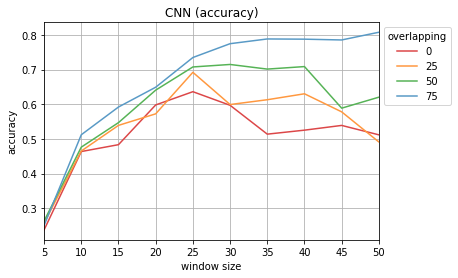

<Figure size 1440x720 with 0 Axes>

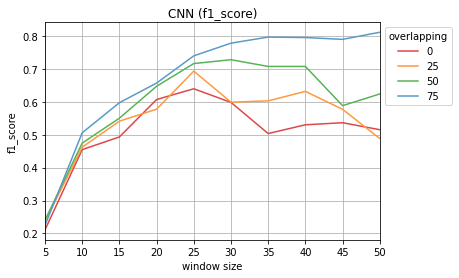

<Figure size 1440x720 with 0 Axes>

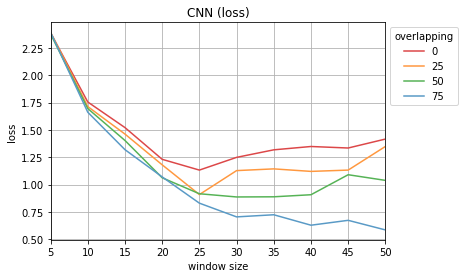

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the accuracy results
plot_window_overlapping("CNN", "accuracy",CNN_df)

# plot the f1 score results
plot_window_overlapping("CNN", "f1_score",CNN_df)

# plot the loss results
plot_window_overlapping("CNN", "loss",CNN_df)

Data segmentation results of the **LSTM** model.

In [ ]:
print("overview of the window size and overlapping expermint - LSTM")
LSTM_df.head(8)

overview of the window size and overlapping expermint - LSTM


,model,window_size,overlapping,hop_size,accuracy,f1_score,loss
48,LSTM,5,0,5,0.643987,0.641626,1.105190
49,LSTM,5,25,3,0.616809,0.616091,1.091390
50,LSTM,5,50,2,0.670782,0.669084,0.979910
51,LSTM,5,75,1,0.710306,0.709888,0.842408
52,LSTM,10,0,10,0.650316,0.652139,1.132363
53,LSTM,10,25,7,0.654485,0.648859,1.028262
54,LSTM,10,50,5,0.793513,0.789986,0.684511
55,LSTM,10,75,2,0.816023,0.816747,0.562826


In [ ]:
print("number of combinations in LSTM is :"+ str(LSTM_df.shape[0]))

number of combinations in LSTM is :48


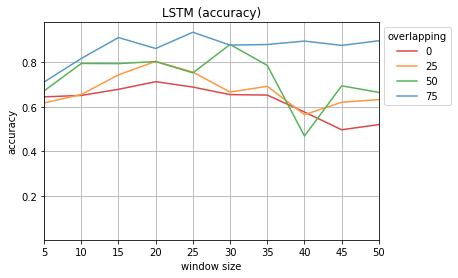

<Figure size 1440x720 with 0 Axes>

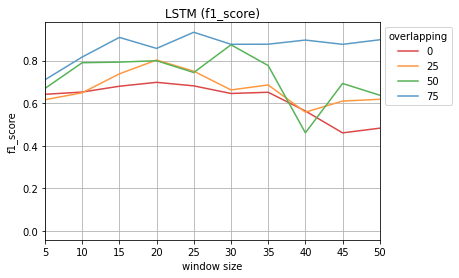

<Figure size 1440x720 with 0 Axes>

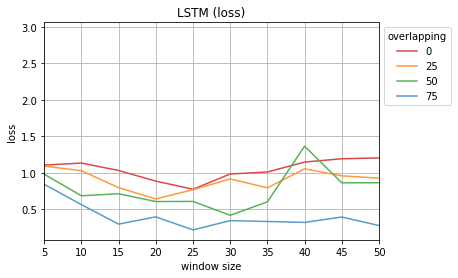

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the accuracy results
plot_window_overlapping("LSTM", "accuracy",LSTM_df)

# plot the f1 score results
plot_window_overlapping("LSTM", "f1_score",LSTM_df)

# plot the loss results
plot_window_overlapping("LSTM", "loss",LSTM_df)

Store the results of the experiment in an excel file, this file can be accessed in the GitHub repository of the project as "data_segmentation_expermint_results.csv".

In [ ]:
window_expermint_df.to_csv('data_segmentation_expermint_results.csv', index=False)

According to the results and discussion in section 4.3 of the report, the optimal window size for the target dataset is **50** with **75%** as the overlapping ratio.

In [ ]:
# window size of 50 and overlapping of 75% was chosen.
window_size = 50 
hop_size = 12 

In [ ]:
# segment the dataset according to the selected window size and overlapping percentage.
X, Y = get_frames(scaled_X, window_size, hop_size)

## 4.4 Data splitting
Data splitting is a fundamental technique utilized for dividing dataset instances into training, testing, and validation sets.
*   **The training set:** is utilized to teach the model and allow it to learn the patterns and relationships within the data instances.
*   **The validation set:** is used to assess the model's performance during the training process.
* **The testing set:** is utilized to evaluate the performance of the final model in predicting new, unseen data. The testing process occurs after the training and validation processes are complete.

we used **%80**, **%10**, and **%10** for training, testing, and validation splitting, respectively.

In [ ]:
# split data set into %80, %10, %10 for training, testing, and validation
X_train, X_valtest, y_train, y_valtest = train_test_split(X, Y, test_size=0.2,stratify = Y)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, stratify = y_valtest)

In [ ]:
# training set
print("X_train: ",X_train.shape)
print("Y_train: ",y_train.shape)

# validation set
print("X_val: ",X_val.shape)
print("Y_val: ",y_val.shape)

# test set
print("X_test: ",X_test.shape)
print("Y_test: ",y_test.shape)

X_train:  (4208, 50, 3)
Y_train:  (4208,)
X_val:  (526, 50, 3)
Y_val:  (526,)
X_test:  (526, 50, 3)
Y_test:  (526,)


After splitting the data, the training dataset contains **4208** samples, while the testing and validation datasets each contain **526** samples

# 5. CNN Model implementation
In this section, we present the code implementation of the CNN. To optimize the performance of the CNN model, it is necessary to adjust its hyperparameters. To accomplish this, we employed **Bayesian optimization** as a hyperparameter tuning technique. Further information regarding the CNN optimization experiment can be found in **section 4.4** of the report.

**Note:** number of convolutional layers is an important hyperparameter that needs to be taken into account when designing a CNN. However, this hyperparameter cannot be optimized using Keras Tuner. As a result, we implemented the CNN model with 1, 2, and 3 layers manually. After analyzing the results, we found that using 3 layers was the most appropriate and yielded the best outcomes on the target dataset

## 5.1 CNN Model with One Layer

In [ ]:
# implement the CNN model with one layer

def build_CNN_model_one_layer(hp):
  
  # start creating the model
  model = Sequential()

  # Conv layer (input layer)
  model.add(Conv1D(filters=hp.Choice('layer1_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer1_kernelsize', [3,5,7]),
                   activation='relu',
                   input_shape=(X_train[0].shape)))
  model.add(MaxPooling1D(pool_size=2))

  # flatten layer to convert the data into vector
  model.add(Flatten())

  # ouput layer
  model.add(Dense(20, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01,0.001,0.0001])),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [ ]:
# use Bayesian optimization for hyperparameter tuning
tuner = kt.BayesianOptimization(build_CNN_model_one_layer, 
                                objective = 'val_accuracy',
                                max_trials = 20,
                                directory = 'CNN_expermint_with_one_layer',
                                project_name = 'CNN_expermint_with_one_layer')

In [ ]:
# start the hyperparameter tuning process
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping])

Trial 20 Complete [00h 01m 11s]
val_accuracy: 0.8307985067367554

Best val_accuracy So Far: 0.838403046131134
Total elapsed time: 00h 19m 31s


In [ ]:
# Get the best hyperparameters and print them
best_params = tuner.get_best_hyperparameters(1)[0].values
print("Best parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best parameters:
layer1_filters: 256
layer1_kernelsize: 5
layer1_dropout: 0.5
learning_rate: 0.001


In [ ]:
# implement a CNN model with best hyperparameters values
best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]

model = tuner.hypermodel.build(best_model)
history = model.fit(X_train, y_train, epochs  = 100, validation_data = (X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
132/132 [==============================] - 3s 18ms/step - loss: 1.9917 - accuracy: 0.3220 - val_loss: 1.5446 - val_accuracy: 0.4544
Epoch 2/100
132/132 [==============================] - 2s 17ms/step - loss: 1.1890 - accuracy: 0.5749 - val_loss: 1.1987 - val_accuracy: 0.5684
Epoch 3/100
132/132 [==============================] - 2s 16ms/step - loss: 0.8818 - accuracy: 0.6868 - val_loss: 1.0154 - val_accuracy: 0.6065
Epoch 4/100
132/132 [==============================] - 2s 18ms/step - loss: 0.7124 - accuracy: 0.7414 - val_loss: 0.9695 - val_accuracy: 0.6122
Epoch 5/100
132/132 [==============================] - 3s 24ms/step - loss: 0.6144 - accuracy: 0.7823 - val_loss: 0.9093 - val_accuracy: 0.6768
Epoch 6/100
132/132 [==============================] - 2s 15ms/step - loss: 0.5281 - accuracy: 0.8163 - val_loss: 0.8652 - val_accuracy: 0.6806
Epoch 7/100
132/132 [==============================] - 2s 16ms/step - loss: 0.4517 - accuracy: 0.8405 - val_loss: 0.7378 - val_accuracy:

In [ ]:
# test the model performance with testing set
print("testing ...")
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)

print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

testing ...
17/17 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.8251
Test Accuracy : 0.8250950574874878
Test Loss : 0.6077121496200562


In [ ]:
# print the classification report that includes percision, recall, f1-score.
print("Classification Report")

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cr = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cr)

Classification Report
17/17 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        22
           2       1.00      0.90      0.95        21
           3       0.95      0.95      0.95        21
           4       0.83      0.70      0.76        27
           5       0.78      0.93      0.85        27
           6       0.71      0.79      0.75        34
           7       0.76      0.76      0.76        34
           8       0.96      0.88      0.92        26
           9       0.96      0.92      0.94        24
          10       0.79      0.88      0.84        26
          11       0.90      0.72      0.80        25
          12       0.92      0.88      0.90        26
          13       0.87      0.83      0.85        24
          14       0.54      0.92      0.68        24
          15       1.00      0.40      0.57        25
      

In [ ]:
# method to plot the training and validation accuracy and loss
# this method is used in section 5, section 6, and section 7 to plot the results of the models

def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.grid()
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.grid()
  plt.show()

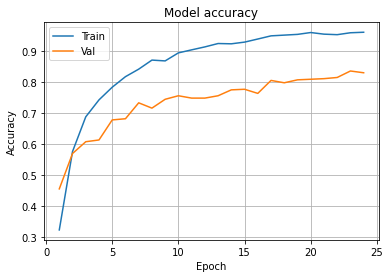

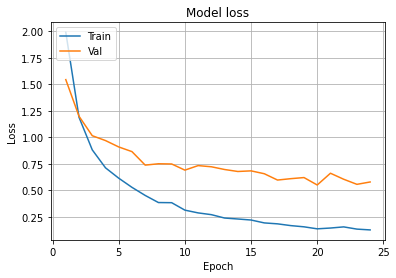

In [ ]:
plot_learningCurve(history,  24)

17/17 [==============================] - 0s 6ms/step


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6bf0e5f40>)

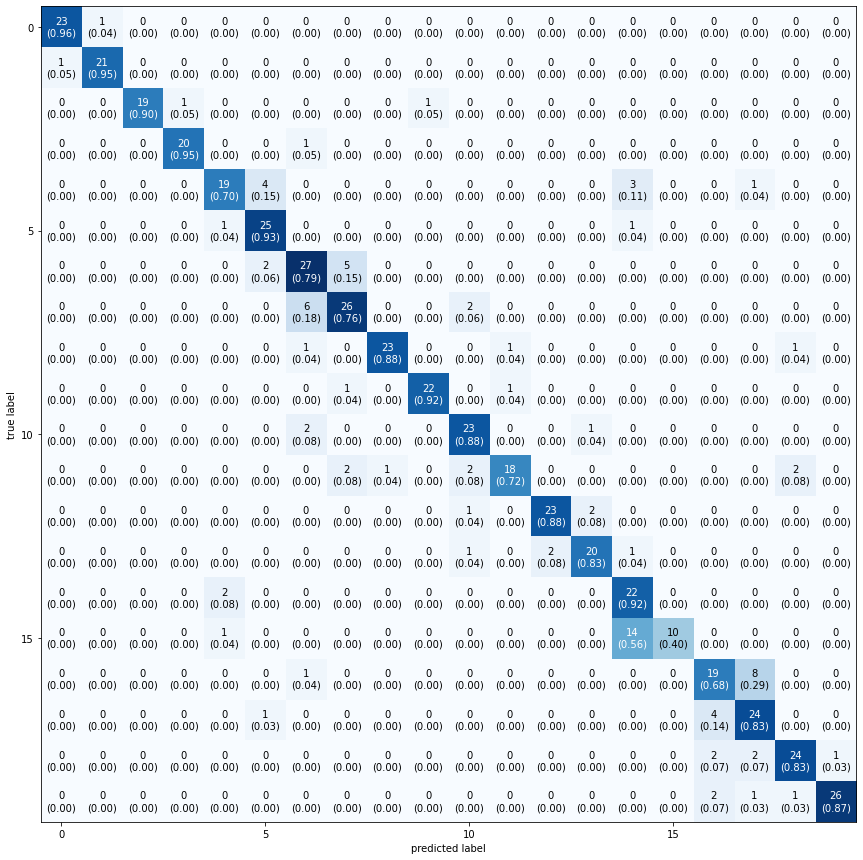

In [ ]:
# print the confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(15,15))

## 5.2 CNN Model with Two Layers

In [ ]:
# implement the CNN model with two layers

def build_CNN_model_two_layers(hp):

  # start creating the model
  model = Sequential()

  # first Conv layer
  model.add(Conv1D(filters=hp.Choice('layer1_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer1_kernelsize', [3,5,7]),
                   activation='relu',
                   input_shape=(X_train[0].shape)))
  model.add(MaxPooling1D(pool_size=2))

  # second Conv layer
  model.add(Conv1D(filters=hp.Choice('layer2_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer2_kernelsize', [3,5,7]),
                   activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(hp.Choice('layer2_dropout', [0.2,0.3,0.4,0.5]))) # dropout layer

  # flatten layer to convert the data into vector
  model.add(Flatten())

  # the ouput layer
  model.add(Dense(20, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01,0.001,0.0001])),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [ ]:
# use Bayesian optimization for hyperparameter tuning
tuner = kt.BayesianOptimization(build_CNN_model_two_layers, 
                                objective = 'val_accuracy',
                                max_trials = 20,
                                directory = 'CNN_expermint_with_two_layers',
                                project_name = 'CNN_expermint_with_two_layers')

In [ ]:
# start the hyperparameter tuning process
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping])

Trial 20 Complete [00h 01m 36s]
val_accuracy: 0.9714828729629517

Best val_accuracy So Far: 0.982889711856842
Total elapsed time: 00h 36m 26s


In [ ]:
# get the best hyperparameters and print them
best_params = tuner.get_best_hyperparameters(1)[0].values
print("Best parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best parameters:
layer1_filters: 256
layer1_kernelsize: 5
layer2_filters: 128
layer2_kernelsize: 5
layer2_dropout: 0.4
learning_rate: 0.001


In [ ]:
# implement a CNN model with best hyperparameters values
best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]

model = tuner.hypermodel.build(best_model)
history = model.fit(X_train, y_train, epochs  =100, validation_data = (X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
132/132 [==============================] - 10s 61ms/step - loss: 2.1207 - accuracy: 0.3058 - val_loss: 1.2062 - val_accuracy: 0.5722
Epoch 2/100
132/132 [==============================] - 4s 34ms/step - loss: 1.0845 - accuracy: 0.6110 - val_loss: 0.7103 - val_accuracy: 0.7738
Epoch 3/100
132/132 [==============================] - 4s 34ms/step - loss: 0.6986 - accuracy: 0.7438 - val_loss: 0.4895 - val_accuracy: 0.8213
Epoch 4/100
132/132 [==============================] - 6s 43ms/step - loss: 0.5005 - accuracy: 0.8258 - val_loss: 0.3243 - val_accuracy: 0.8916
Epoch 5/100
132/132 [==============================] - 4s 34ms/step - loss: 0.3644 - accuracy: 0.8738 - val_loss: 0.2816 - val_accuracy: 0.9049
Epoch 6/100
132/132 [==============================] - 5s 38ms/step - loss: 0.2962 - accuracy: 0.9007 - val_loss: 0.2240 - val_accuracy: 0.9373
Epoch 7/100
132/132 [==============================] - 5s 39ms/step - loss: 0.2313 - accuracy: 0.9268 - val_loss: 0.1721 - val_accuracy

In [ ]:
# test the model performance with testing set
print("testing ...")
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

testing ...
17/17 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.9411
Test Accuracy : 0.9410646557807922
Test Loss : 0.27375245094299316


In [ ]:
# print the classification report that includes percision, recall, f1-score.
print("Classification Report")
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cr = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cr)

Classification Report
17/17 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.91      0.95        22
           2       0.91      1.00      0.95        21
           3       0.95      0.90      0.92        20
           4       1.00      1.00      1.00        27
           5       0.96      1.00      0.98        27
           6       0.89      0.97      0.93        34
           7       0.97      0.97      0.97        35
           8       1.00      0.92      0.96        26
           9       0.96      0.92      0.94        24
          10       1.00      0.96      0.98        26
          11       0.96      0.96      0.96        25
          12       0.96      1.00      0.98        26
          13       0.95      0.91      0.93        23
          14       0.86      0.72      0.78        25
          15       0.79      0.88      0.83        25
     

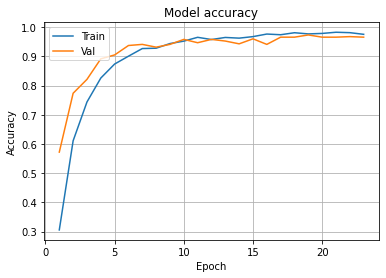

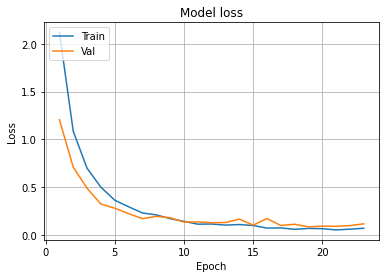

In [ ]:
plot_learningCurve(history,  23)

17/17 [==============================] - 0s 11ms/step


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f952f6dd3a0>)

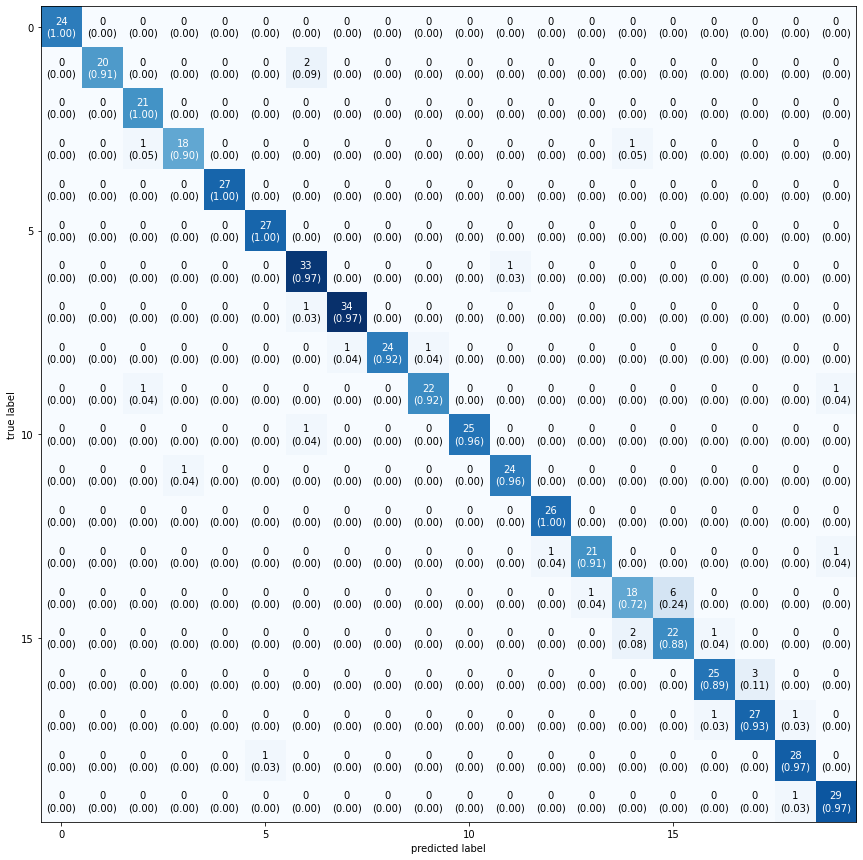

In [ ]:
# print the confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(15,15))

## 5.3 CNN Model with Three Layers

In [ ]:
# implement the CNN model with three layers

def build_model_CNN_three_layers(hp):

  # start creating the model
  model = Sequential()

  # first Conv layer
  model.add(Conv1D(filters=hp.Choice('layer1_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer1_kernelsize', [3,5,7]),
                   activation='relu',
                   input_shape=(X_train[0].shape)))
  model.add(MaxPooling1D(pool_size=2))

  # second Conv layer
  model.add(Conv1D(filters=hp.Choice('layer2_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer2_kernelsize', [3,5,7]),
                   activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(hp.Choice('layer2_dropout', [0.2,0.3,0.4,0.5]))) # dopout layer

  # third Conv layer
  model.add(Conv1D(filters=hp.Choice('layer3_filters', [32, 64, 128, 256]),
                   kernel_size=hp.Choice('layer3_kernelsize', [3,5,7]),
                   activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(hp.Choice('layer3_dropout', [0.2,0.3,0.4,0.5]))) # dropout layer

  # flatten layer to convert the data into vector
  model.add(Flatten())

  # the ouput layer
  model.add(Dense(20, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01,0.001,0.0001])),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [ ]:
# use Bayesian optimization for hyperparameter tuning
tuner = kt.BayesianOptimization(build_model_CNN_three_layers, 
                                objective = 'val_accuracy',
                                max_trials = 20,
                                directory = 'CNN_expermint_with_three_layers',
                                project_name = 'CNN_expermint_with_three_layers')

In [ ]:
# start the hyperparameter tuning process
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping])

Trial 20 Complete [00h 00m 24s]
val_accuracy: 0.8174905180931091

Best val_accuracy So Far: 0.9866920113563538
Total elapsed time: 00h 58m 24s


In [ ]:
# get the best hyperparameters and print them
best_params = tuner.get_best_hyperparameters(1)[0].values
print("Best parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best parameters:
layer1_filters: 256
layer1_kernelsize: 5
layer2_filters: 128
layer2_kernelsize: 3
layer2_dropout: 0.2
layer3_filters: 128
layer3_kernelsize: 3
layer3_dropout: 0.5
learning_rate: 0.001


In [ ]:
# implement a CNN model with best hyperparameters values
best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]

model = tuner.hypermodel.build(best_model)
history = model.fit(X_train, y_train, epochs  =100, validation_data = (X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
132/132 [==============================] - 5s 28ms/step - loss: 2.5100 - accuracy: 0.1918 - val_loss: 1.6377 - val_accuracy: 0.4791
Epoch 2/100
132/132 [==============================] - 5s 36ms/step - loss: 1.4776 - accuracy: 0.4644 - val_loss: 0.8842 - val_accuracy: 0.7148
Epoch 3/100
132/132 [==============================] - 3s 25ms/step - loss: 0.9884 - accuracy: 0.6383 - val_loss: 0.6008 - val_accuracy: 0.8137
Epoch 4/100
132/132 [==============================] - 3s 25ms/step - loss: 0.7337 - accuracy: 0.7341 - val_loss: 0.4102 - val_accuracy: 0.8840
Epoch 5/100
132/132 [==============================] - 4s 28ms/step - loss: 0.5474 - accuracy: 0.8189 - val_loss: 0.2953 - val_accuracy: 0.9163
Epoch 6/100
132/132 [==============================] - 4s 33ms/step - loss: 0.4621 - accuracy: 0.8389 - val_loss: 0.2797 - val_accuracy: 0.9335
Epoch 7/100
132/132 [==============================] - 3s 26ms/step - loss: 0.3660 - accuracy: 0.8707 - val_loss: 0.2205 - val_accuracy:

In [ ]:
# test the model performance with testing set
print("testing ...")
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

testing ...
17/17 [==============================] - 0s 7ms/step - loss: 0.1191 - accuracy: 0.9544
Test Accuracy : 0.9543726444244385
Test Loss : 0.11908314377069473


In [ ]:
# print the classification report that includes percision, recall, f1-score.
print("Classification Report")
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cr = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cr)

Classification Report
17/17 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.88      1.00      0.94        22
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        20
           4       0.96      0.96      0.96        27
           5       0.96      0.96      0.96        27
           6       0.89      0.97      0.93        34
           7       0.94      0.91      0.93        34
           8       0.96      0.92      0.94        26
           9       0.96      1.00      0.98        24
          10       1.00      1.00      1.00        25
          11       0.96      0.96      0.96        25
          12       0.96      0.88      0.92        26
          13       0.96      0.96      0.96        24
          14       0.86      1.00      0.93        25
          15       1.00      0.80      0.89        25
      

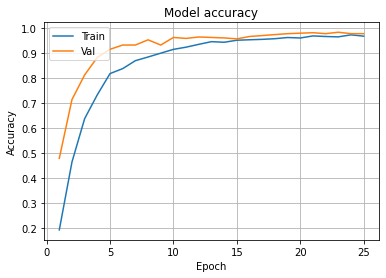

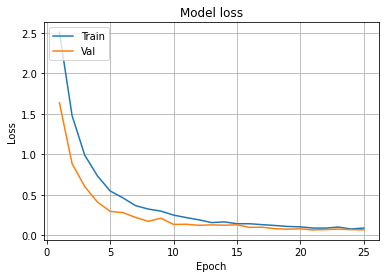

In [ ]:
plot_learningCurve(history,  25)

17/17 [==============================] - 0s 7ms/step


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f40982a3700>)

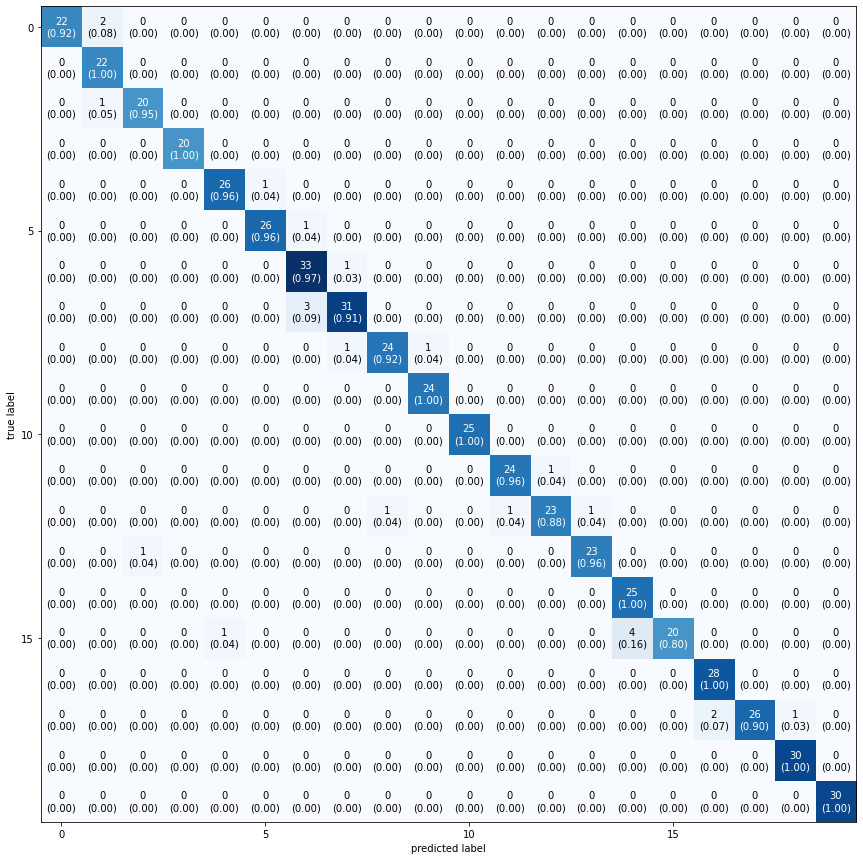

In [ ]:
# print the confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(15,15))

# 6. LSTM Model Implementation
This section presents the code and implementation of the LSM model. Similar to CNN, the LSTM model also has hyperparameters that need to be optimized. Therefore, an additional experiment was conducted to adjust the hyperparameters of the LSTM model. For further information on the optimization of the LSTM model, please refer to **section 4.5** of the report.

## 6.1 LSTM Model

In [ ]:
# implement the CNN model with three layers

def build_LSTM(hp):

  # start creating the model
  model = Sequential()

  # LSTM layers
  model.add(LSTM(units = hp.Choice('layer1_units', [32, 64, 128, 256]), return_sequences  = True, input_shape=(X_train[0].shape)))
  model.add(LSTM(units = hp.Choice('layer2_units', [32, 64, 128, 256])))

  # dropout layer
  model.add(Dropout(hp.Choice('dropout_rate', [0.2,0.3,0.4,0.5])))

  # output layer
  model.add(Dense(20, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01,0.001,0.0001])),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [ ]:
# use Bayesian optimization for hyperparameter tuning
tuner = kt.BayesianOptimization(build_LSTM, 
                                objective = 'val_accuracy',
                                max_trials = 20,
                                directory = 'LSTM_expermint',
                                project_name = 'LSTM_expermint')

In [ ]:
# start the hyperparameter tuning process
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping])

Trial 20 Complete [00h 00m 36s]
val_accuracy: 0.9334600567817688

Best val_accuracy So Far: 0.9733840227127075
Total elapsed time: 00h 16m 38s


In [ ]:
# get the best hyperparameters and print them
best_params = tuner.get_best_hyperparameters(1)[0].values
print("Best parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best parameters:
layer1_units: 256
layer2_units: 128
dropout_rate: 0.4
learning_rate: 0.001


In [ ]:
# implement a LSTM model with best hyperparameters values
best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]

model = tuner.hypermodel.build(best_model)
history = model.fit(X_train, y_train, epochs  =100, validation_data = (X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
132/132 [==============================] - 6s 22ms/step - loss: 2.5818 - accuracy: 0.1690 - val_loss: 2.2154 - val_accuracy: 0.2548
Epoch 2/100
132/132 [==============================] - 1s 10ms/step - loss: 1.9368 - accuracy: 0.3222 - val_loss: 1.6780 - val_accuracy: 0.3859
Epoch 3/100
132/132 [==============================] - 1s 10ms/step - loss: 1.5458 - accuracy: 0.4247 - val_loss: 1.4164 - val_accuracy: 0.4791
Epoch 4/100
132/132 [==============================] - 1s 10ms/step - loss: 1.2732 - accuracy: 0.5093 - val_loss: 1.1357 - val_accuracy: 0.5817
Epoch 5/100
132/132 [==============================] - 1s 10ms/step - loss: 1.0800 - accuracy: 0.5820 - val_loss: 0.9916 - val_accuracy: 0.6521
Epoch 6/100
132/132 [==============================] - 1s 10ms/step - loss: 0.9171 - accuracy: 0.6378 - val_loss: 0.8958 - val_accuracy: 0.6616
Epoch 7/100
132/132 [==============================] - 2s 14ms/step - loss: 0.8368 - accuracy: 0.6683 - val_loss: 0.7263 - val_accuracy:

## 6.2 Results
Discussion of the results can be found in **section 4.7** of the report.

In [ ]:
# test the model performance with testing set
print("testing ...")
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

testing ...
17/17 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.9487
Test Accuracy : 0.9486691951751709
Test Loss : 0.1840887814760208


In [ ]:
# print the classification report that includes percision, recall, f1-score.
print("Classification Report")
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cr = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cr)

Classification Report
17/17 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.95      0.91      0.93        22
           2       0.95      1.00      0.98        21
           3       0.95      0.95      0.95        20
           4       0.96      0.89      0.92        27
           5       0.96      0.96      0.96        27
           6       1.00      0.97      0.99        34
           7       0.97      0.94      0.96        35
           8       0.92      0.85      0.88        26
           9       0.92      1.00      0.96        24
          10       0.96      0.96      0.96        26
          11       0.96      0.96      0.96        25
          12       0.96      0.96      0.96        26
          13       0.85      1.00      0.92        23
          14       0.85      0.88      0.86        25
          15       0.96      0.88      0.92        25
      

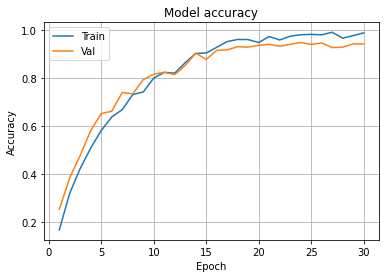

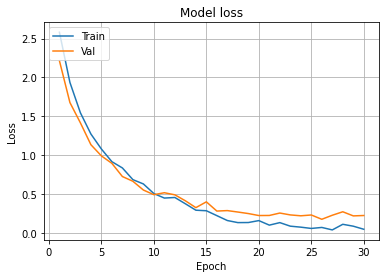

In [ ]:
plot_learningCurve(history,  30)

17/17 [==============================] - 0s 5ms/step


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f03cceebb80>)

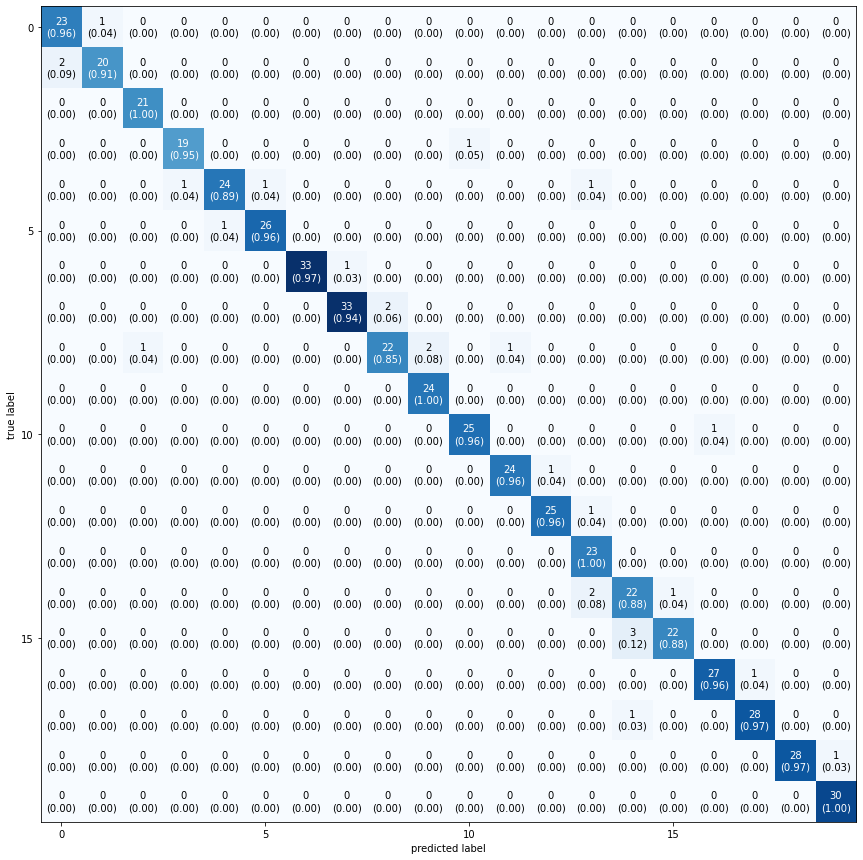

In [ ]:
# print the confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(15,15))

# 7. Hybrid CNN-LSTM Model Implementation
We have implemented a hybrid CNN-LSTM model in this section, as shown in Figure 2, by utilizing the optimal hyperparameters obtained from our earlier CNN and LSTM models. Further details can be found in **section 4.6** of the report.

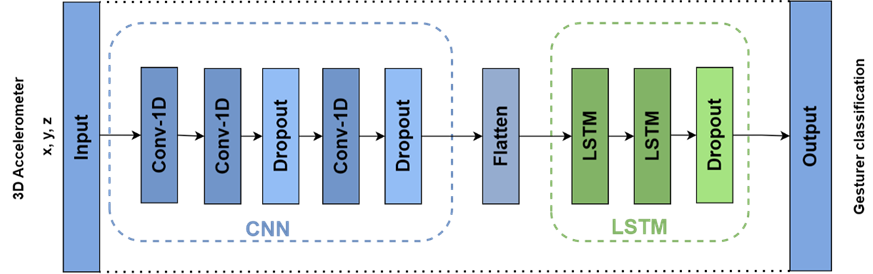

<font color='grey'>Figure 2: Hybrid CNN-LSTM model architecture.</font>

## 7.1 CNN-LSTM model

In [ ]:
# implement the CNN-LSTM model
def build_CNN_LSTM():

  # start creating the model
  model = Sequential()

  # first Conv layer (input layer)
  model.add(Conv1D(filters=256,kernel_size=5,activation='relu',input_shape=(X_train[0].shape)))
  model.add(MaxPooling1D(pool_size=2))

  # second Conv layer
  model.add(Conv1D(filters=128,kernel_size=3,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2)) # dropout layer

  # third Conv layer
  model.add(Conv1D(filters=128,kernel_size=3,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.5)) # dropout laayer

  # flatten layer to convert the data into vector
  model.add(TimeDistributed(Flatten()))

  # LSTM layers
  model.add(LSTM(256, return_sequences  =True))
  model.add(LSTM(128))
  model.add(Dropout(0.4)) # dropout layer

  # ouput layer
  model.add(Dense(20, activation = 'softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [ ]:
model = build_CNN_LSTM()

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks = [early_stopping],
                    verbose=1 )

Epoch 1/100
132/132 [==============================] - 7s 15ms/step - loss: 2.6159 - accuracy: 0.1345 - val_loss: 1.9678 - val_accuracy: 0.2814
Epoch 2/100
132/132 [==============================] - 1s 9ms/step - loss: 1.6441 - accuracy: 0.3897 - val_loss: 1.1946 - val_accuracy: 0.5228
Epoch 3/100
132/132 [==============================] - 1s 11ms/step - loss: 1.2124 - accuracy: 0.5273 - val_loss: 0.8817 - val_accuracy: 0.6692
Epoch 4/100
132/132 [==============================] - 2s 12ms/step - loss: 0.9653 - accuracy: 0.6231 - val_loss: 0.7326 - val_accuracy: 0.7205
Epoch 5/100
132/132 [==============================] - 1s 9ms/step - loss: 0.8426 - accuracy: 0.6673 - val_loss: 0.6102 - val_accuracy: 0.7662
Epoch 6/100
132/132 [==============================] - 1s 9ms/step - loss: 0.6689 - accuracy: 0.7417 - val_loss: 0.5443 - val_accuracy: 0.7852
Epoch 7/100
132/132 [==============================] - 1s 9ms/step - loss: 0.6012 - accuracy: 0.7814 - val_loss: 0.5315 - val_accuracy: 0.8

## 7.2 Results
Discussion of the results can be found in **section 4.7** of the report.

In [ ]:
# test the model performance with testing set
print("testing ...")
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

testing ...
17/17 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9601
Test Accuracy : 0.9600760340690613
Test Loss : 0.12240748852491379


In [ ]:
# print the classification report that includes percision, recall, f1-score.
print("Classification Report")
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cr = classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cr)

Classification Report
17/17 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        22
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        20
           4       0.93      1.00      0.96        27
           5       1.00      0.96      0.98        27
           6       0.94      1.00      0.97        34
           7       1.00      0.94      0.97        35
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        25
          12       1.00      0.77      0.87        26
          13       0.76      0.96      0.85        23
          14       0.91      0.84      0.87        25
          15       0.92      0.92      0.92        25
      

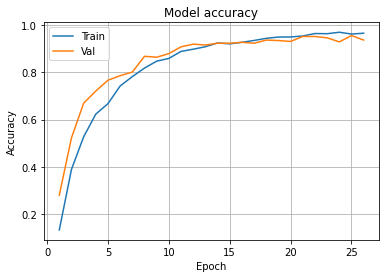

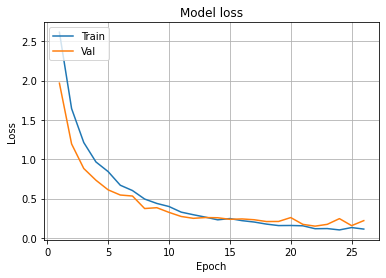

In [ ]:
plot_learningCurve(history,  26)

17/17 [==============================] - 0s 5ms/step


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f03ccf77310>)

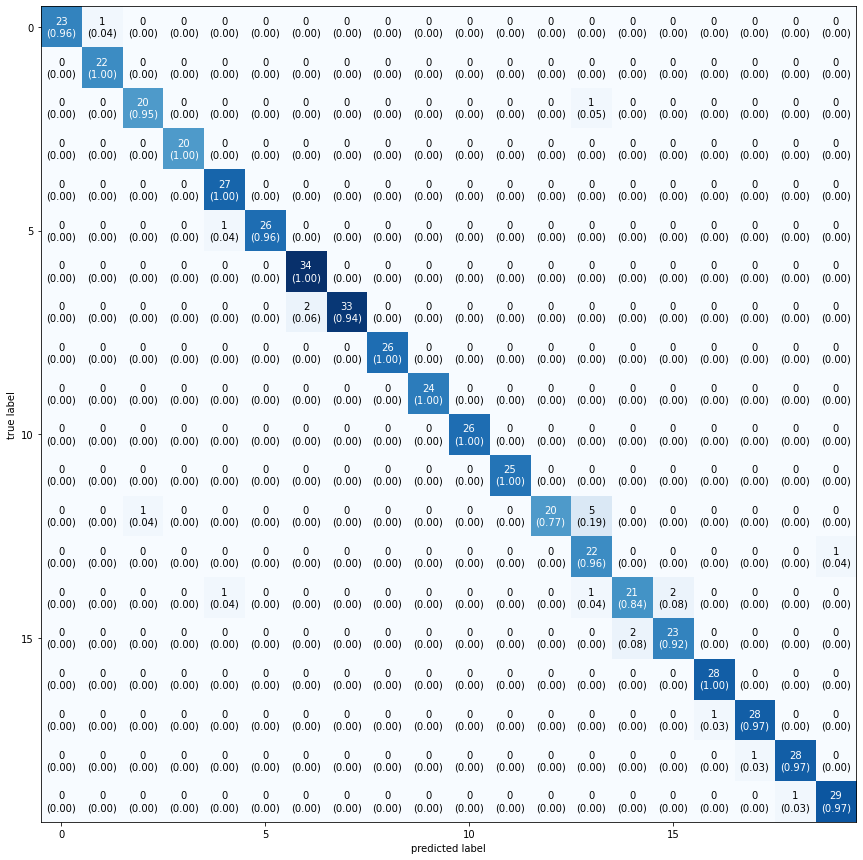

In [ ]:
# print the confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(15,15))

# 8. Conclusion
In conclusion, this code document provides a guide to the development of sensor-based hand gesture recognition. Through the use of Python and Google Collab, we have accomplished the requirements for this project by implementing three models: CNN, LSTM, and CNN-LSTM. Results indicate that the hybrid CNN-LSTM model achieved the highest accuracy of %96, demonstrating the benefits of combining these two types of deep learning architectures.

# 9. References
[1] [SmartWatch Gestures Dataset](https://tev.fbk.eu/resources/smartwatch)<br>
[2] [Effects of sliding window variation in the performance of acceleration-based human activity recognition using deep learning models (paper)](https://peerj.com/articles/cs-1052/)